In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import config
import time

pd.options.display.max_columns =  500
plt.style.use('fivethirtyeight')
color_pal  = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
fred_key = config.api_key

fred = Fred(api_key=fred_key)

In [3]:
us_inflation = fred.get_series('FPCPITOTLZGUSA')
us_inflation = us_inflation.to_frame('US inflation')

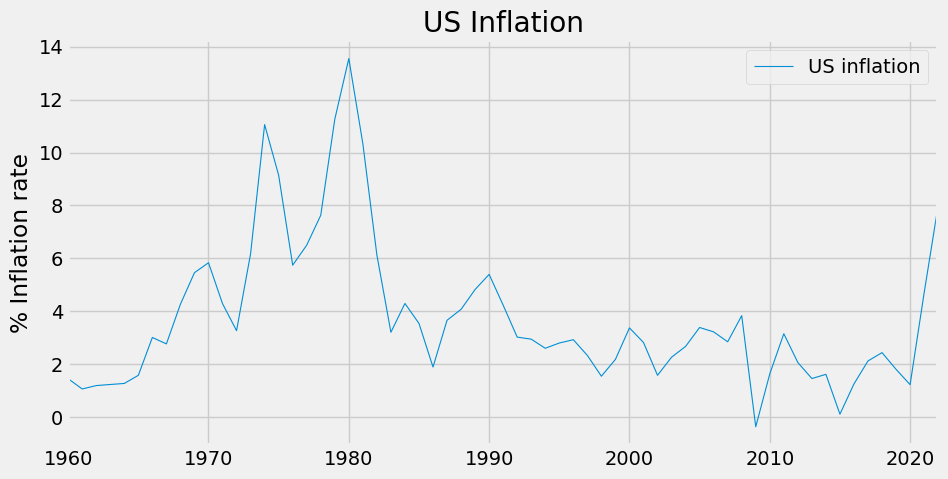

In [4]:
us_inflation.plot(figsize=(10,5), title='US Inflation', lw=0.8)
plt.ylabel("% Inflation rate")
plt.show()

In [5]:
federal_fund_rate = fred.get_series('DFF')
federal_fund_rate = federal_fund_rate.to_frame('Federal fund rate')

In [6]:
us_inflation_fund_rate = pd.concat([us_inflation, federal_fund_rate])

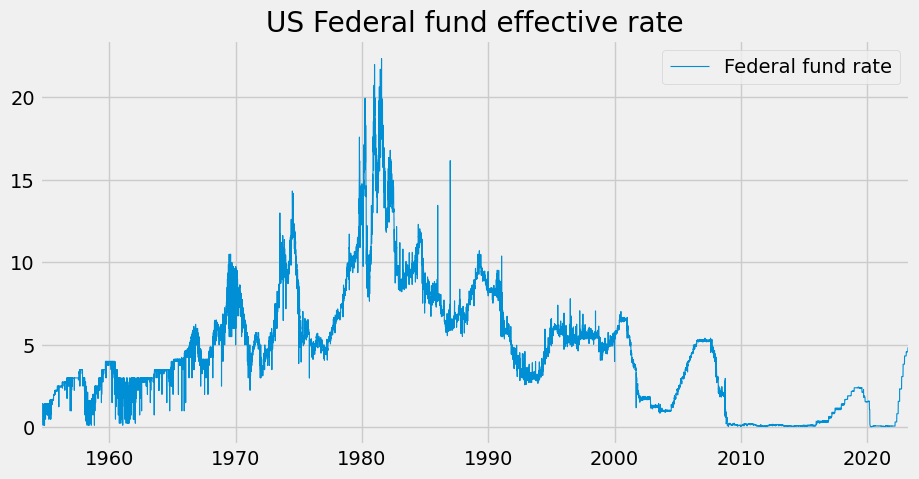

In [7]:
federal_fund_rate.plot(figsize=(10,5), title='US Federal fund effective rate', lw=0.8)
plt.show()

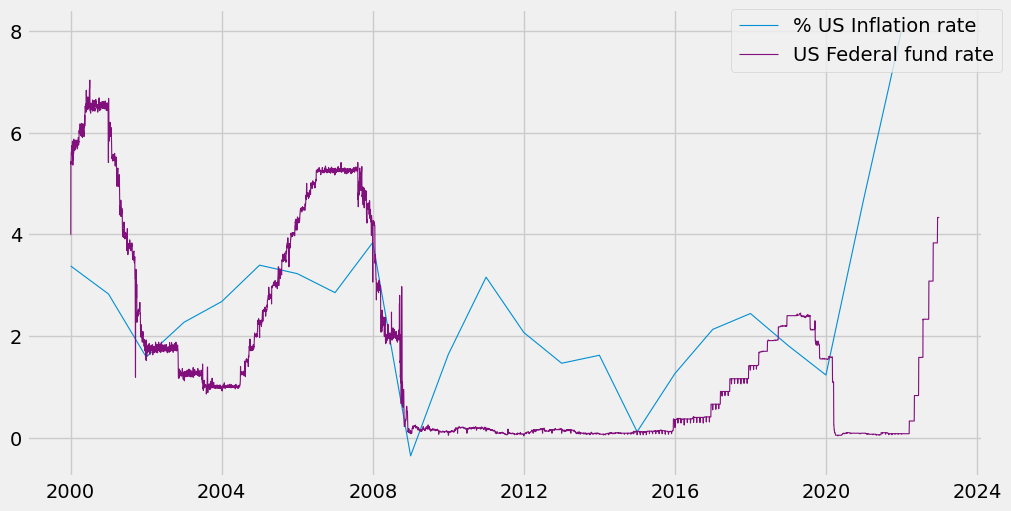

In [8]:
fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

ax.plot(us_inflation.query('index >=2000 and index <= 2023'), lw=0.8)
ax.plot(federal_fund_rate.query('index >=2000 and index <= 2023'), lw=0.8, color=color_pal[5])

fig.legend(labels=['% US Inflation rate', 'US Federal fund rate'])
plt.show()

In [9]:
px.line(us_inflation_fund_rate)

In [10]:
eu = [
  'AUT', 'BEL', 'BGR','HRV', 'CZE', 'DNK', 'EST', 'FIN', 'FRA',
  'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT',
  'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR'
]

In [11]:
all_results = []
for i in eu:
    results = fred.get_series(f'FPCPITOTLZG{i}')
    results = results.to_frame(name=i)
    all_results.append(results)
    time.sleep(0.1)
inflation_ue_country = pd.concat(all_results, axis=1)

In [25]:
country = list(inflation_ue_country.loc[inflation_ue_country.index == '2022-01-01'].T.sort_values('2022-01-01').dropna().index)
inflation = list(inflation_ue_country.loc[inflation_ue_country.index == '2022-01-01'].T.sort_values('2022-01-01').dropna()['2022-01-01'])

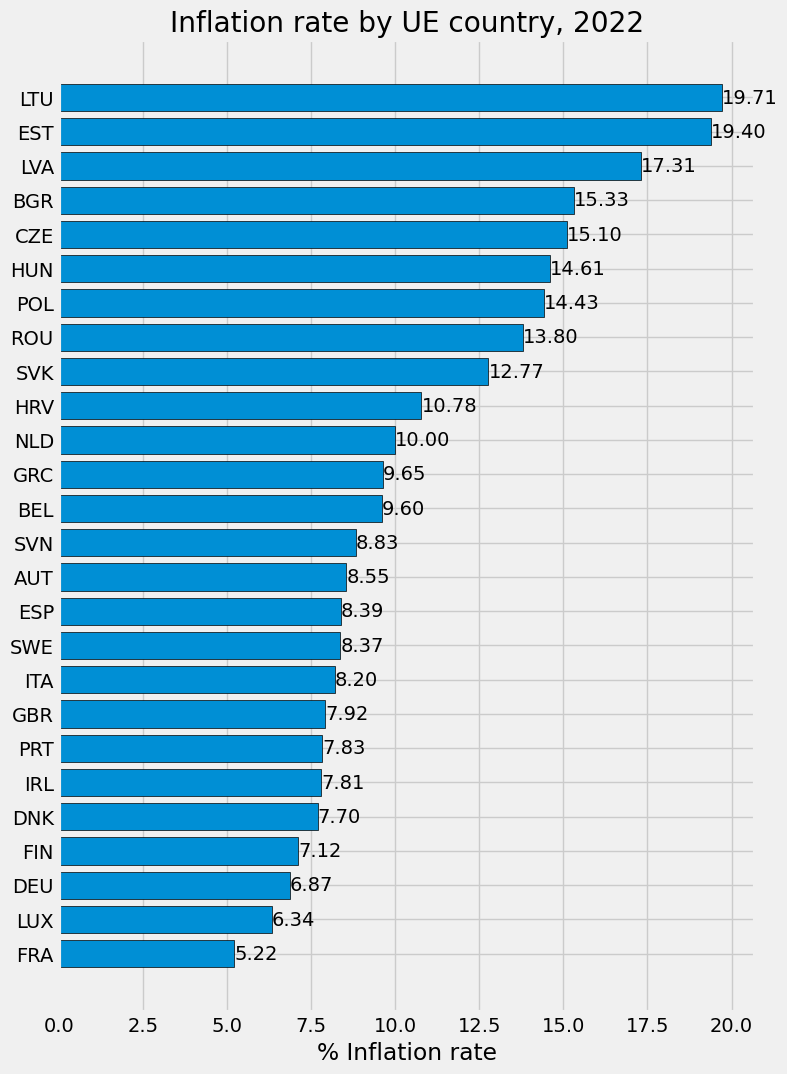

In [26]:
fig, ax = plt.subplots(figsize=(8,12))
bar = ax.barh(country, inflation, edgecolor='black')
ax.bar_label(bar, fmt='%.2f')
plt.title('Inflation rate by UE country, 2022')
ax.set_xlabel('% Inflation rate')
plt.show()


In [14]:
ecb_deposit = fred.get_series('ECBDFR')
ecb_deposit = ecb_deposit.to_frame(name='ECB Deposit rate')
eu_inflation = fred.get_series('FPCPITOTLZGEUU')
eu_inflation = eu_inflation.to_frame(name='Eu Inflation')

In [15]:
ecb_inflation_eu = pd.concat([ecb_deposit,eu_inflation])

In [16]:
px.line(ecb_inflation_eu.query('index >= 2000'))

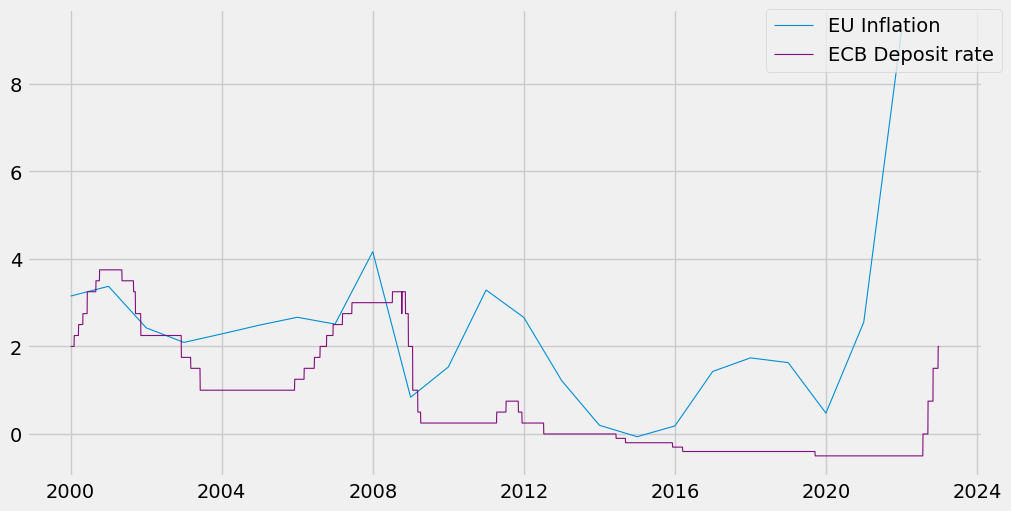

In [17]:
fig, ax = plt.subplots(figsize=(10,5), layout='constrained')

ax.plot(eu_inflation.query('index >=2000 and index <= 2023'), lw=0.8)
ax.plot(ecb_deposit.query('index >=2000 and index <= 2023'), lw=0.8, color=color_pal[5])

fig.legend(labels=['EU Inflation', 'ECB Deposit rate'])
plt.show()

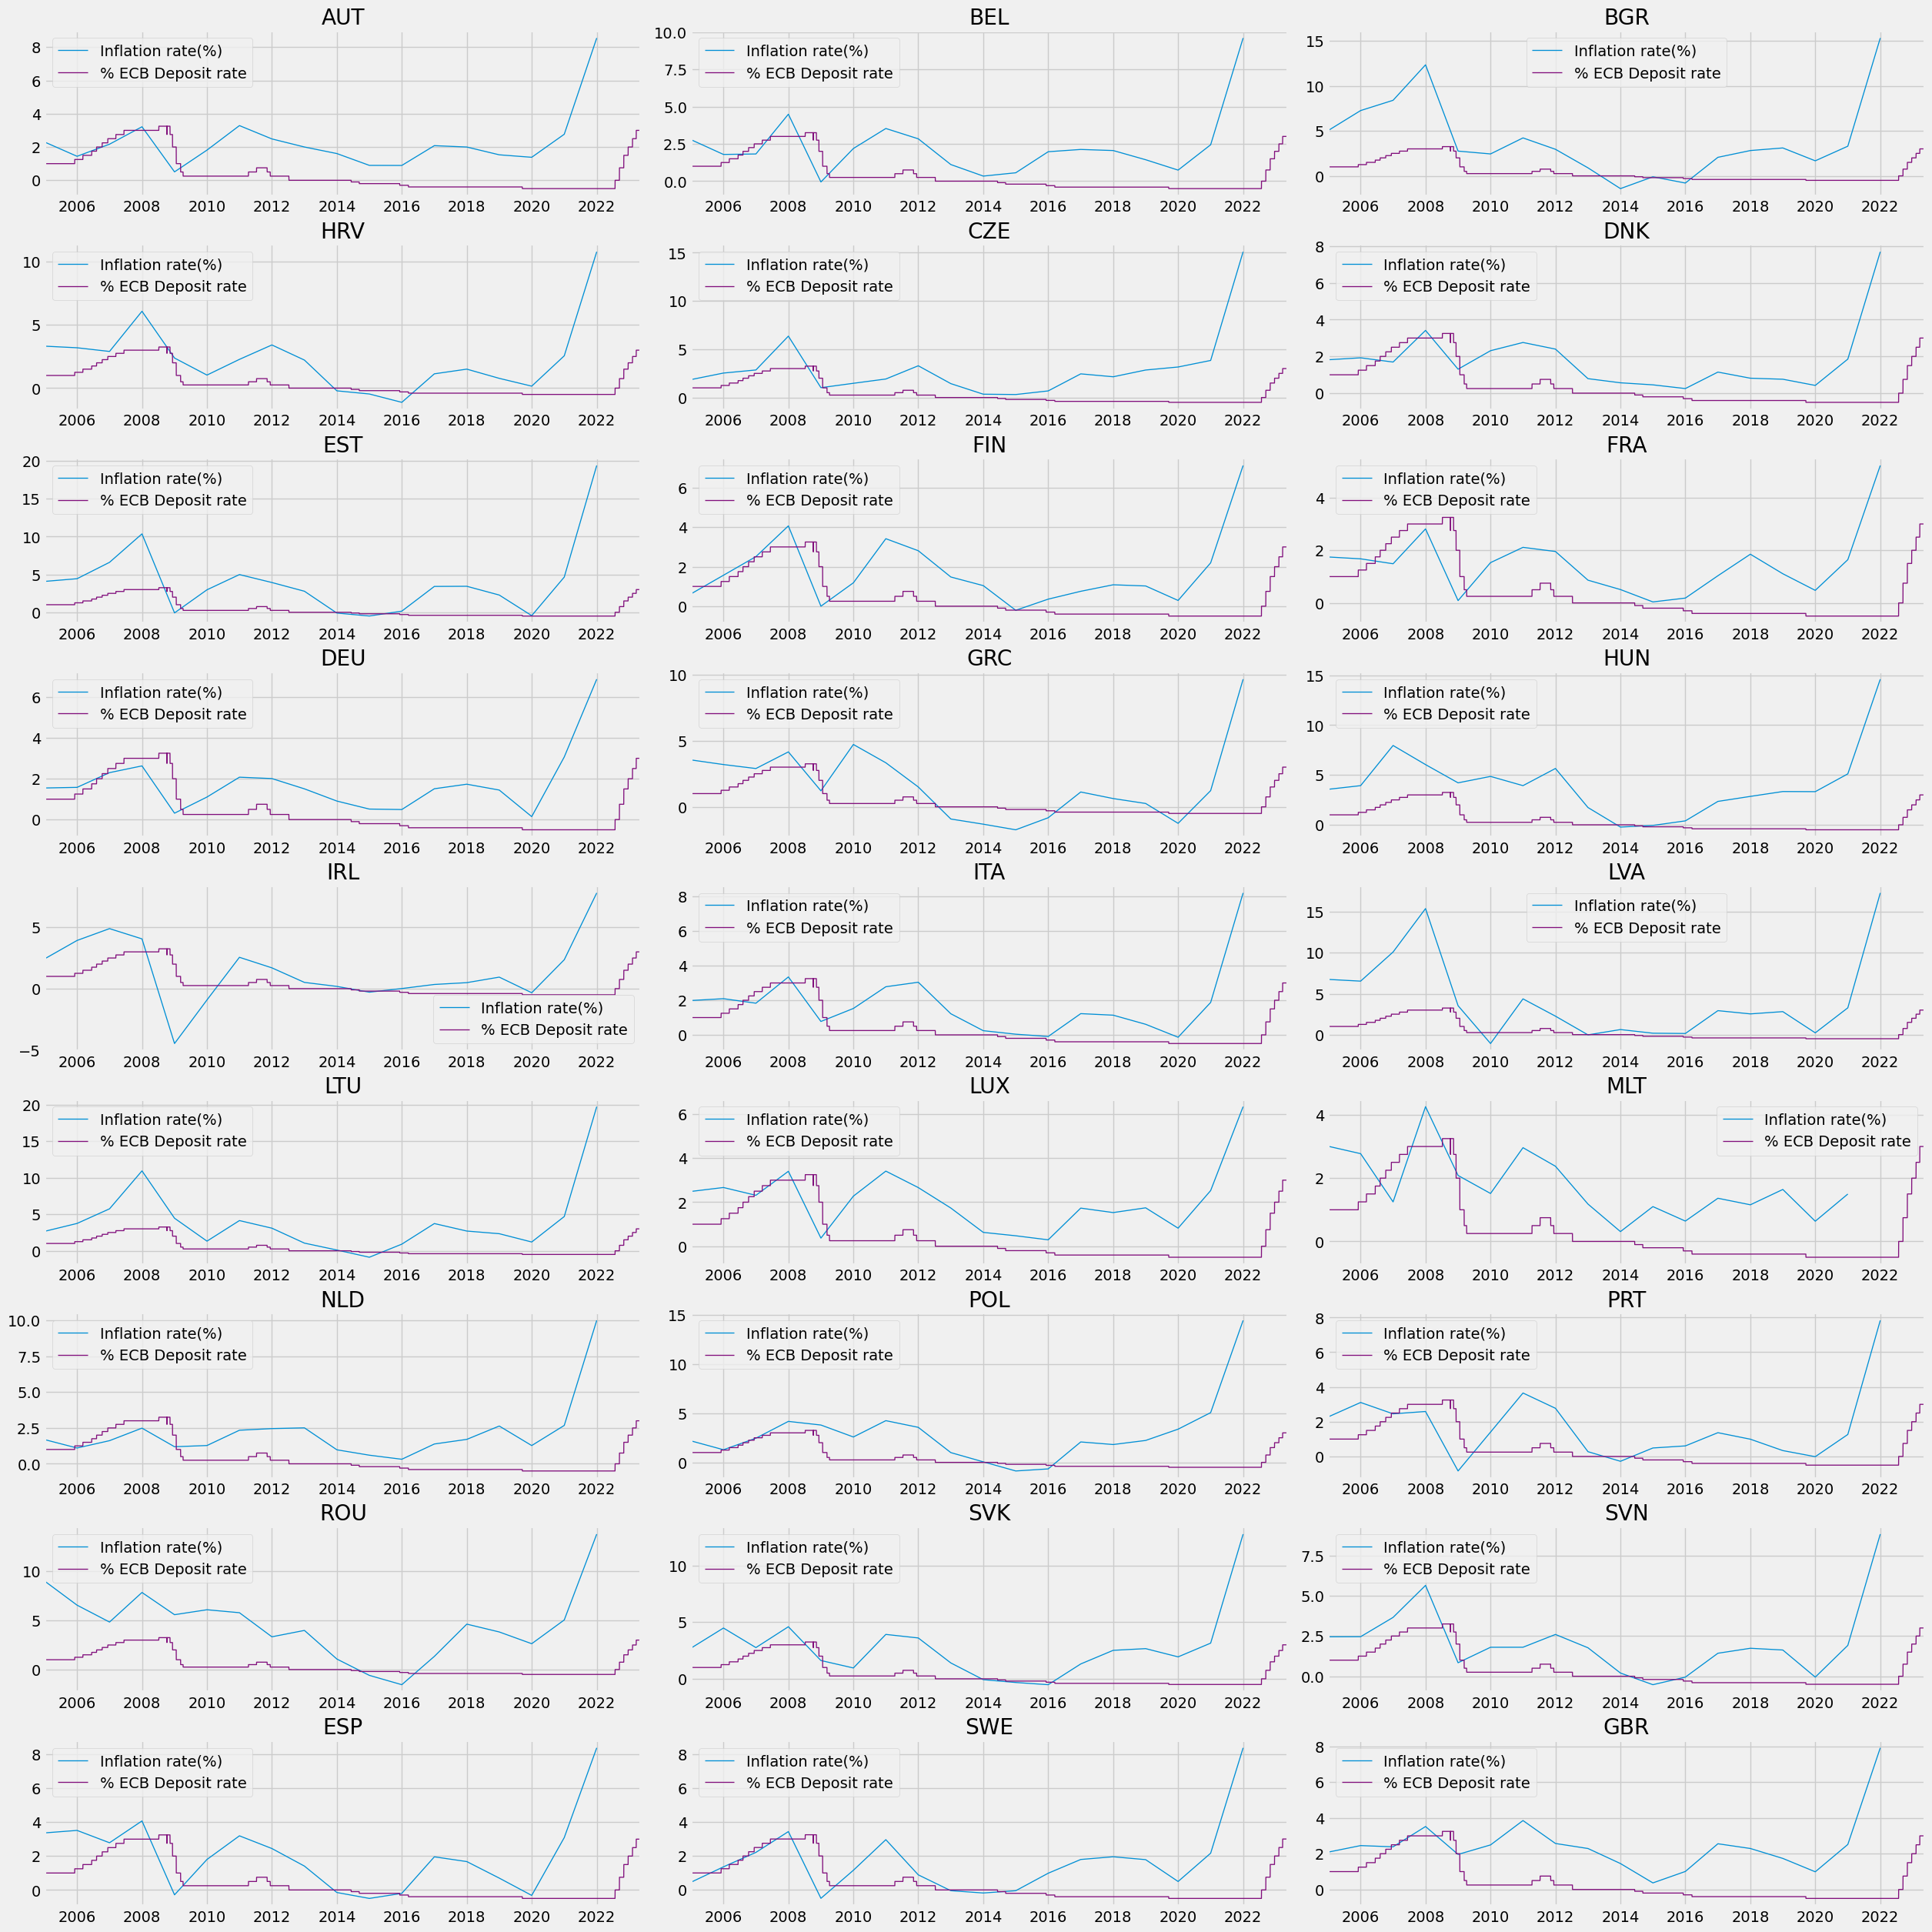

In [18]:
fig, axes = plt.subplots(9, 3, figsize=(25,25), layout='constrained')
axe = axes.flatten()

j = 0

for i, country in enumerate(inflation_ue_country.columns):
    inflation_ue_country.query('index >= 2005')[country].plot(ax=axe[i], lw=0.95, label='Inflation rate')
    ecb_deposit.query('index >= 2005').plot(ax=axe[i], color=color_pal[5], lw=0.95)
    axe[i].set_title(country)
    axe[i].legend(['Inflation rate(%)', '% ECB Deposit rate'])
    j+=1
plt.show()